Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [3]:
# Drop unnecessary columns
drop_columns = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']
movies_df = movies_df.drop(columns=drop_columns)

# Check if columns have been dropped successfully
if all(col not in movies_df.columns for col in drop_columns):
    print("Columns have been dropped successfully.")
else:
    print("Columns could not be dropped.")

Columns have been dropped successfully.


#### Remove any duplicate rows

In [4]:
# Remove duplicate rows
original_rows_count = len(movies_df)
movies_df.drop_duplicates(inplace=True)

# Check if duplicate rows have been removed successfully
if len(movies_df) < original_rows_count:
    print("Duplicate rows have been removed successfully.")
else:
    print("No duplicate rows found.")

# Keep track of the number of deleted duplicate rows
duplicate_rows_removed = original_rows_count - len(movies_df)
print(f"Number of duplicate rows removed: {duplicate_rows_removed}")

No duplicate rows found.
Number of duplicate rows removed: 0


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [3]:
# Get the number of rows before dropping entries
initial_rows_count = len(movies_df)

# Filter out rows where budget or revenue is zero
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

# Get the number of rows after dropping entries
final_rows_count = len(movies_df)

# Check if any entries were successfully deleted
if final_rows_count < initial_rows_count:
    print("Entries with zero budget or zero revenue have been deleted successfully.")
else:
    print("No entries with zero budget or zero revenue found.")

Entries with zero budget or zero revenue have been deleted successfully.


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [93]:
# Convert the release_date column to a datetime format using the pd.to_datetime() function
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the year from the release date using the dt.year accessor
movies_df['release_year'] = movies_df['release_date'].dt.year

# Print the DataFrame to verify the changes
print(movies_df.head())

      budget                                             genres  \
0  237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
1  300000000                 ['Adventure', 'Fantasy', 'Action']   
2  245000000                   ['Action', 'Adventure', 'Crime']   
3  250000000           ['Action', 'Crime', 'Drama', 'Thriller']   
4  260000000         ['Action', 'Adventure', 'Science Fiction']   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [14]:
# Change the budget and revenue columns to integers using the int64 method
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

# Print the DataFrame to verify the changes
print(movies_df.head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [61]:
# Define parse_col_json function
def parse_col_json(df, column, key):
    """
    Convert JSON format in a DataFrame column to a list of strings.

    Args:
        df (pandas.DataFrame): DataFrame containing the column to be processed.
        column (str): Name of the column to be processed.
        key (str): Name of the dictionary key to be extracted.
    
    Returns:
        pandas.DataFrame: DataFrame with the specified column converted to a list of strings.
    """
    # Convert JSON strings to dictionaries
    df[column] = df[column].apply(json.loads)
    
    # Extract values corresponding to the key
    df[column] = df[column].apply(lambda x: [item[key] for item in x])
    
    # Convert the list of strings back to string format
    df[column] = df[column].apply(str)
    
    return df

# Using movies_df as the DataFrame
movies_df = parse_col_json(movies_df, 'genres', 'name')
movies_df = parse_col_json(movies_df, 'production_countries', 'name')
movies_df = parse_col_json(movies_df, 'spoken_languages', 'name')

In [5]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [15]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]

# Print the movies in the "Action" genre
print("Action movies:")
for index, row in action_movies.iterrows():
    print(row['title'])

Action movies:
Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Avengers: Age of Ultron
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
King Kong
Captain America: Civil War
Battleship
Jurassic World
Skyfall
Spider-Man 2
Iron Man 3
X-Men: The Last Stand
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
The Amazing Spider-Man 2
TRON: Legacy
Green Lantern
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek Into Darkness
Jack the Giant Slayer
Prince of Persia: The Sands of Time
Pacific Rim
Transformers: Dark of the Moon
Indiana Jones and the Kingdom of the Crystal Skull
Brave
Star Trek Beyond
Rush Hour 3
2012
Jupiter Ascending
The Legend of Tarzan
The Da

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [21]:
expensive_movies = movies_df.nlargest(5, 'budget')

print("The top 5 most expensive movies are:")
print(expensive_movies[['title', 'budget', 'revenue']])

The top 5 most expensive movies are:
                                          title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802
1      Pirates of the Caribbean: At World's End  300000000   961000000
7                       Avengers: Age of Ultron  280000000  1405403694
10                             Superman Returns  270000000   391081192
4                                   John Carter  260000000   284139100


In [4]:
cheapest_movies = movies_df.nsmallest(5, 'budget')

print("The top 5 least expensive movies are:")
print(cheapest_movies[['title', 'budget', 'revenue']])

The top 5 least expensive movies are:
                                      title  budget    revenue
265                      The Cat in the Hat       0          0
321                            The Campaign       0  104907746
359  Alvin and the Chipmunks: The Road Chip       0  233755553
406                        Arthur Christmas       0          0
409                           All That Jazz       0   37823676


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [18]:
# Calculate the profit for each movie by subtracting the budget from the revenue generated
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Find the 5 most profitable movies
profitable_movies = movies_df.nlargest(5, 'profit')

# Print the 5 most profitable movies
print("Top 5 most profitable movies are:")
print(profitable_movies[['title', 'profit']])

Top 5 most profitable movies are:
             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910


In [94]:
# Calculate the profit for each movie by subtracting the budget from the revenue generated
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Find the 5 most profitable movies
least_profitable_movies = movies_df.nsmallest(5, 'profit')

# Print the 5 most profitable movies
print("Top 5 least profitable movies are:")
print(least_profitable_movies[['title', 'profit']])

Top 5 least profitable movies are:
                     title     profit
13         The Lone Ranger -165710090
135            The Wolfman -150000000
338              The Alamo -119180039
141        Mars Needs Moms -111007242
1652  Dragonball Evolution -100000000


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [19]:
# Sort movies based on the popularity column in descending order
movies_df_sorted = movies_df.sort_values(by='popularity', ascending=False)

# Print the sorted DataFrame
print(movies_df_sorted[['title', 'popularity']])

                           title  popularity
546                      Minions  875.581305
95                  Interstellar  724.247784
788                     Deadpool  514.569956
94       Guardians of the Galaxy  481.098624
127           Mad Max: Fury Road  434.278564
...                          ...         ...
4625            Midnight Cabaret    0.001389
4118      Hum To Mohabbat Karega    0.001186
4727                Penitentiary    0.001117
3361                  Alien Zone    0.000372
4553  America Is Still the Place    0.000000

[4803 rows x 2 columns]


#### Find Movies which are rated above 7

In [20]:
# Obtain movies with a vote_average > 7
movies_rated_above_7 = movies_df[movies_df['vote_average'] > 7]

# Print the movies
print("Movies rated above 7:")
print(movies_rated_above_7[['title', 'vote_average']])

Movies rated above 7:
                                       title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4755                                Counting           8.3
4766                          The Last Waltz           7.9
4773                                  Clerks           7.4
4792                                    Cure           7.4
4797                                  Cavite           7.5

[809 rows x 2 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

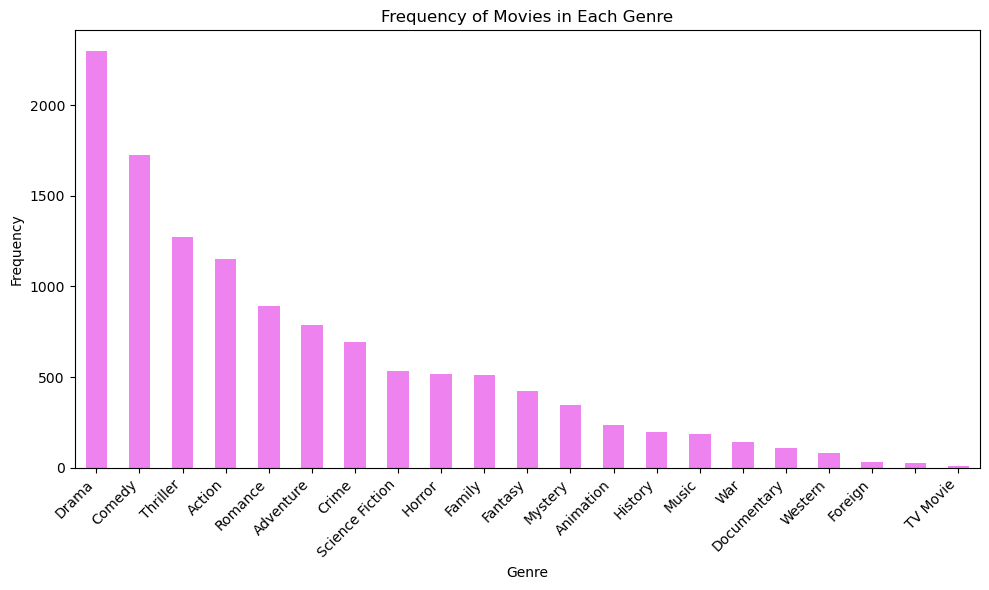

In [68]:
# Flatten the lists of genres
all_genres = movies_df['genres'].apply(lambda x: [genre.strip("[]").strip("' '") for genre in x.split(',')]).explode()

# Count the frequency of each genre
genre_counts = all_genres.value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='violet')
plt.title('Frequency of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The dataset indicates that drama is the most common genre, followed by comedy and thriller. Conversely, the least prevalent genres are TV movies, foreign, and Western.

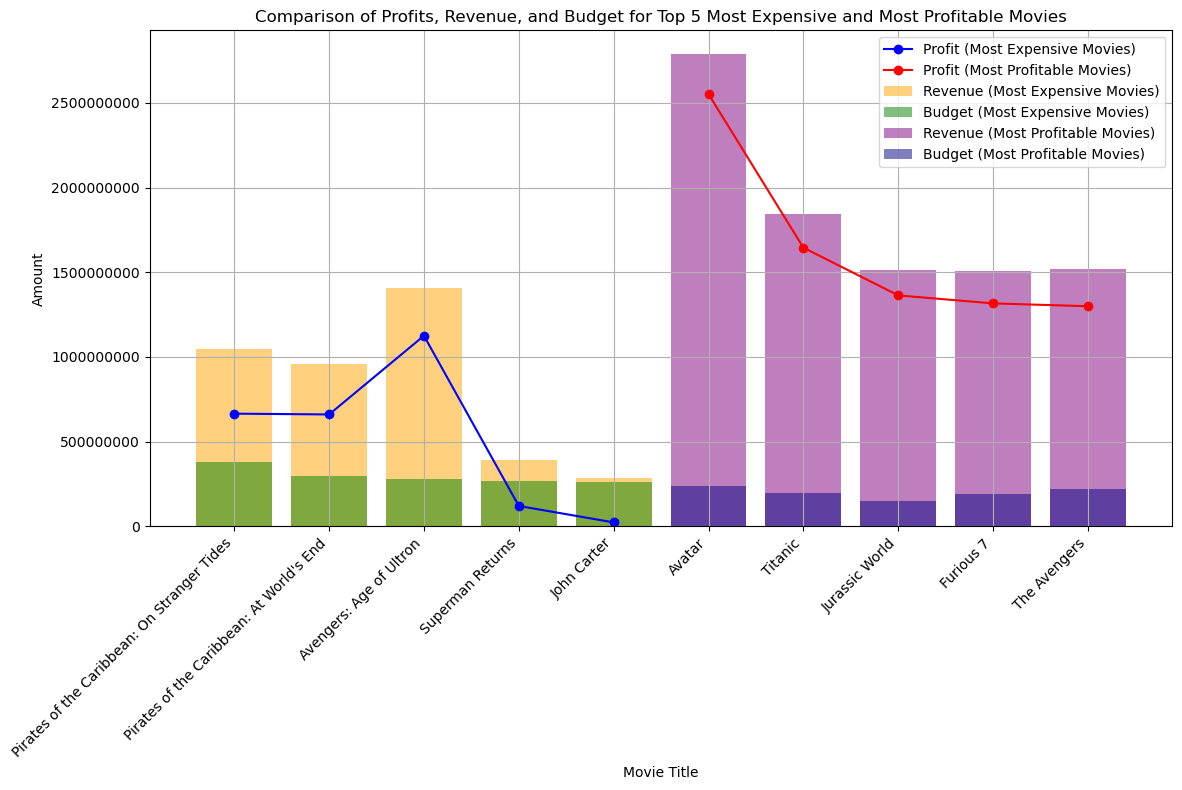

In [80]:
# Sort the DataFrame by budget to get the top 5 most expensive movies
top_expensive_movies = movies_df.nlargest(5, 'budget')

# Sort the DataFrame by profit to get the top 5 most profitable movies
top_profitable_movies = movies_df.nlargest(5, 'profit')

# Calculate profit for each set of movies
top_expensive_movies['profit'] = top_expensive_movies['revenue'] - top_expensive_movies['budget']
top_profitable_movies['profit'] = top_profitable_movies['revenue'] - top_profitable_movies['budget']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting top 5 most expensive movies
plt.plot(top_expensive_movies['title'], top_expensive_movies['profit'], marker='o', color='blue', label='Profit (Most Expensive Movies)')
plt.bar(top_expensive_movies['title'], top_expensive_movies['revenue'], color='orange', alpha=0.5, label='Revenue (Most Expensive Movies)')
plt.bar(top_expensive_movies['title'], top_expensive_movies['budget'], color='green', alpha=0.5, label='Budget (Most Expensive Movies)')

# Plotting top 5 most profitable movies
plt.plot(top_profitable_movies['title'], top_profitable_movies['profit'], marker='o', color='red', label='Profit (Most Profitable Movies)')
plt.bar(top_profitable_movies['title'], top_profitable_movies['revenue'], color='purple', alpha=0.5, label='Revenue (Most Profitable Movies)')
plt.bar(top_profitable_movies['title'], top_profitable_movies['budget'], color='navy', alpha=0.5, label='Budget (Most Profitable Movies)')

# Adding labels and title
plt.xlabel('Movie Title')
plt.ylabel('Amount')
plt.title('Comparison of Profits, Revenue, and Budget for Top 5 Most Expensive and Most Profitable Movies')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)  # Adding grid lines for better readability

# Disable scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

Comparing the top 5 most expensive and most profitable movies reveals no direct correlation between budget and profit. Notably, "Avengers: Age of Ultron", despite having the third-highest budget among the top 5 most expensive movies, achieved the highest revenue and profit. Similarly, "Avatar," the highest-grossing movie in the dataset, didn't have a significantly high budget compared to the other top earners, yet it generated the highest revenue and profit. This underscores the lack of a clear correlation between budget and profitability.

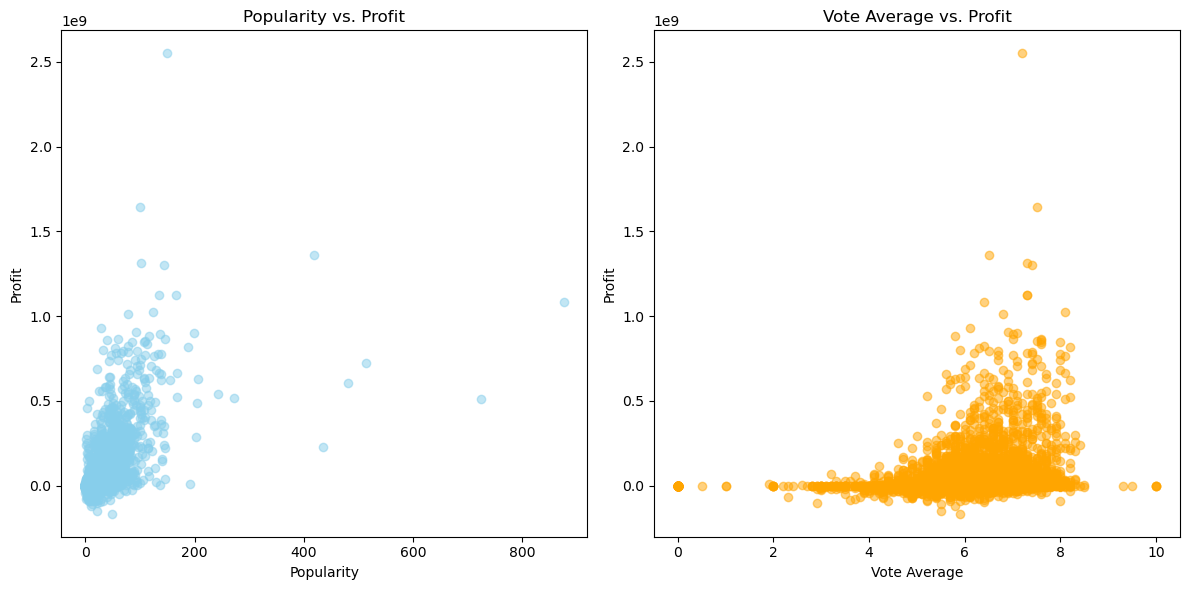

In [91]:
# Create a subplot and set its size
plt.figure(figsize=(12, 6))

# Subplot 1: Scatter plot for popularity vs. profit
plt.subplot(1, 2, 1) # Create a subplot grid with 1 row and 2 columns, and select the first subplot
plt.scatter(movies_df['popularity'], movies_df['profit'], color='skyblue', alpha=0.5) # Plot popularity vs. profit
plt.title('Popularity vs. Profit') # Set title for subplot
plt.xlabel('Popularity') # Set label for x axis
plt.ylabel('Profit') # Set label for y-axis

# Subplot 2: Scatter plot for vote_average vs. profit
plt.subplot(1, 2, 2) # Create a subplot grid with 1 row and 2 columns, and select the second subplot
plt.scatter(movies_df['vote_average'], movies_df['profit'], color='orange', alpha=0.5) # Plot vote average vs. profit
plt.title('Vote Average vs. Profit') # Set title for subplot
plt.xlabel('Vote Average') # Set label for x axis
plt.ylabel('Profit') # Set label for y axis

plt.tight_layout() # Adjust subplot layout to prevent overlapping
plt.show() # Display plot

The scatterplot illustrating the relationship between popularity and profit indicates a weak or negative correlation between popularity and profit. This is indicated by the clustering of data points on the lower-left portion of the plot where movies have both low popularity and low profit. However, there is one significant outlier, where a single movie (This has already been identified as Avatar) stands out with remarkably high popularity and profit compared to the rest of the dataset. This outlier suggests that certain movies can achieve exceptional success in terms of both popularity and profit. Additionally, there are a few data points scattered further to the right of the plot, indicating movies with higher popularity but still moderate levels of profit compared to the outlier.

The scatterplot illustrating the relationship between vote average and profit indicates a somewhat scattered or weak correlation. There is a predominant clustering of data points along the horizontal axis, particularly towards the lower end of the profit scale. This clustering suggests that a considerable number of movies tend to have lower profitability regardless of their average rating.The mound-like formation around vote averages of 6 to 8 suggests a clustering of movies with moderate ratings and varying levels of profitability. Once again, Avatar, with a high profit despite a moderate vote average, indicates that exceptions exist to this general trend.

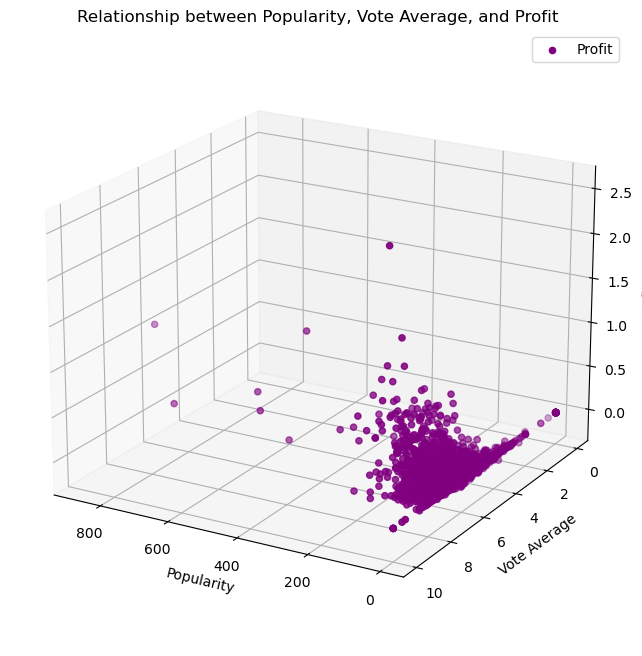

In [96]:
from mpl_toolkits.mplot3d import Axes3D

# Create a subplot and set its size
fig = plt.figure(figsize=(10, 8))
# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for popularity, vote_average, and profit
scatter = ax.scatter(movies_df['popularity'], movies_df['vote_average'], movies_df['profit'], color='purple')

# Set labels and title
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote Average')
ax.set_zlabel('Profit')
ax.set_title('Relationship between Popularity, Vote Average, and Profit')

# Adjust viewing angle
ax.view_init(elev=20, azim=120)

# Add legend
ax.legend([scatter], ['Profit'])

plt.show()

The 3D scatterplot reveals clusters of movies with varying levels of popularity and vote average. These clusters suggest that movies tend to have moderate ratings and relatively low popularity. However, within these clusters, there is a notable concentration of films with moderate vote averages, indicating a potential threshold for profitability. An outlier stands out, demonstrating exceptional profitability despite moderate popularity. This outlier emphasizes the potential for movies to achieve remarkable financial success despite receiving modest critical acclaim. Additionally, the presence of highly popular movies within the dataset suggests a diverse range of audience preferences and viewing habits. Overall, the scatterplot provides insights into the complex interplay between popularity, vote average, and profitability in the movie industry.